In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import time 

from dateutil import parser  
# this one so that we can parse our date filed

dataset =pd.read_csv("appdata10.csv")

### EDA part ###

dataset.head()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [47]:
# using the describe function : it gives us a summary 
dataset.describe()


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# data cleaning 
#we are going to convert the date type into an int 
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [49]:
# Plotting 
# we create a temporary data frame , but we are going to drop the colums that we do not 
# need from the orginal dataset 
# this so that we can see 
dataset2 = dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

# we take a look to see the data 
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


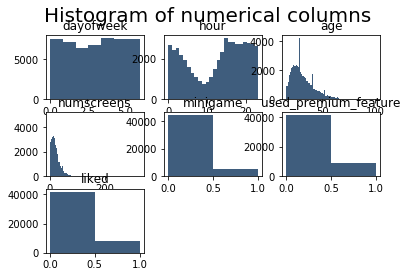

In [50]:
# Histograme : so that we get familiar with the distribution of our data set 

# first : the title of the histogram
plt.suptitle('Histogram of numerical columns',fontsize=20)

# we are going to iterate inside the data set 
# shape gives us the dimension of the dataset and since python doesnt 
# include the last column we add 1
for i in range(1,dataset2.shape[1]+1):
    # we give it the dimension since we have 7 columns a 3 by 3 is good 
    plt.subplot(3,3,i)
    # the gca command cleans up the fields 
    f =plt.gca()
    # set title for the features
    f.set_title(dataset2.columns.values[i-1])
    
    # we are going to consider just the unique values 
    vals= np.size(dataset2.iloc[:,i-1].unique())
    
    # now the histogram
    plt.hist(dataset2.iloc[:,i-1],bins=vals, color='#3F5D7D')


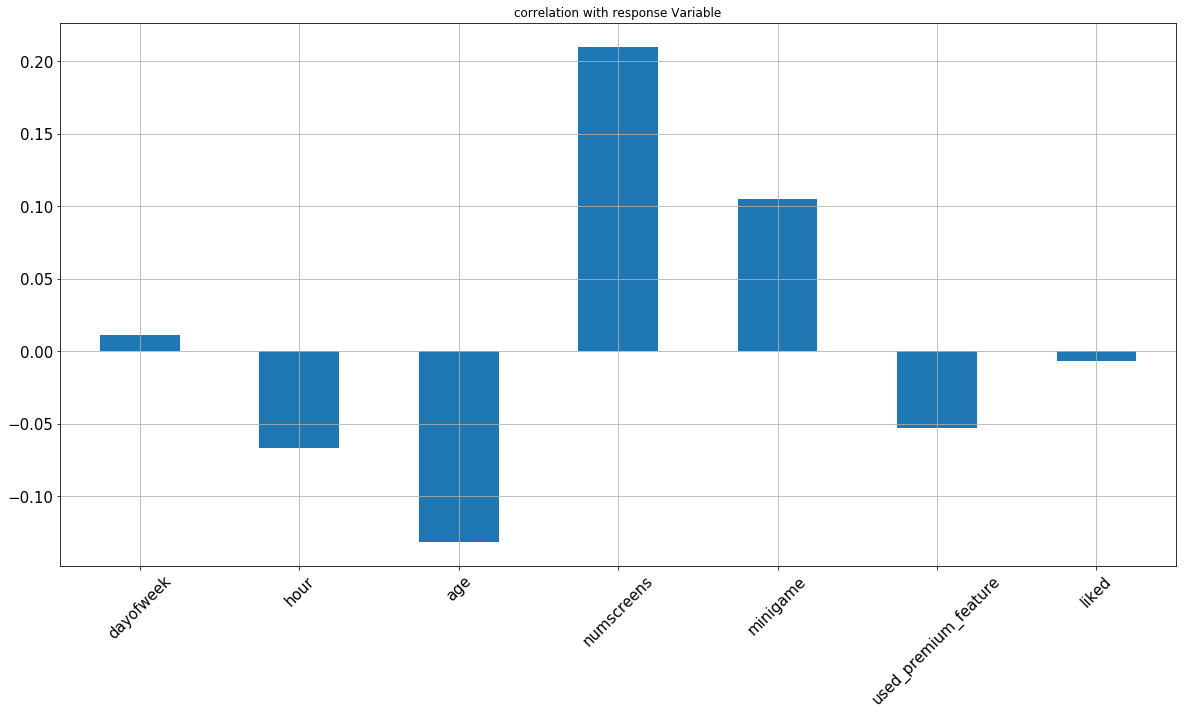

In [51]:
# now we are going to see the correlation with the  response variable
# correlation plot 
# corrwith() returns a numerical list of correlation of the variable and the response variable  
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                        title = 'correlation with response Variable',
                                            fontsize = 15,rot=45,
                                        grid=True     )
# rot means that the labels are going to be rotated with a 45 angle
# grid is going to create a grid to be more pleasant to the eye


In [52]:
# so here we can see that numscreen is positively correlated with the response 
# meaning the more numscreen a client goes through the more likely he might buy the app 

# on the other hand age is negatively correlated , so the more the person is old the less likely he is 
# to buy the app 


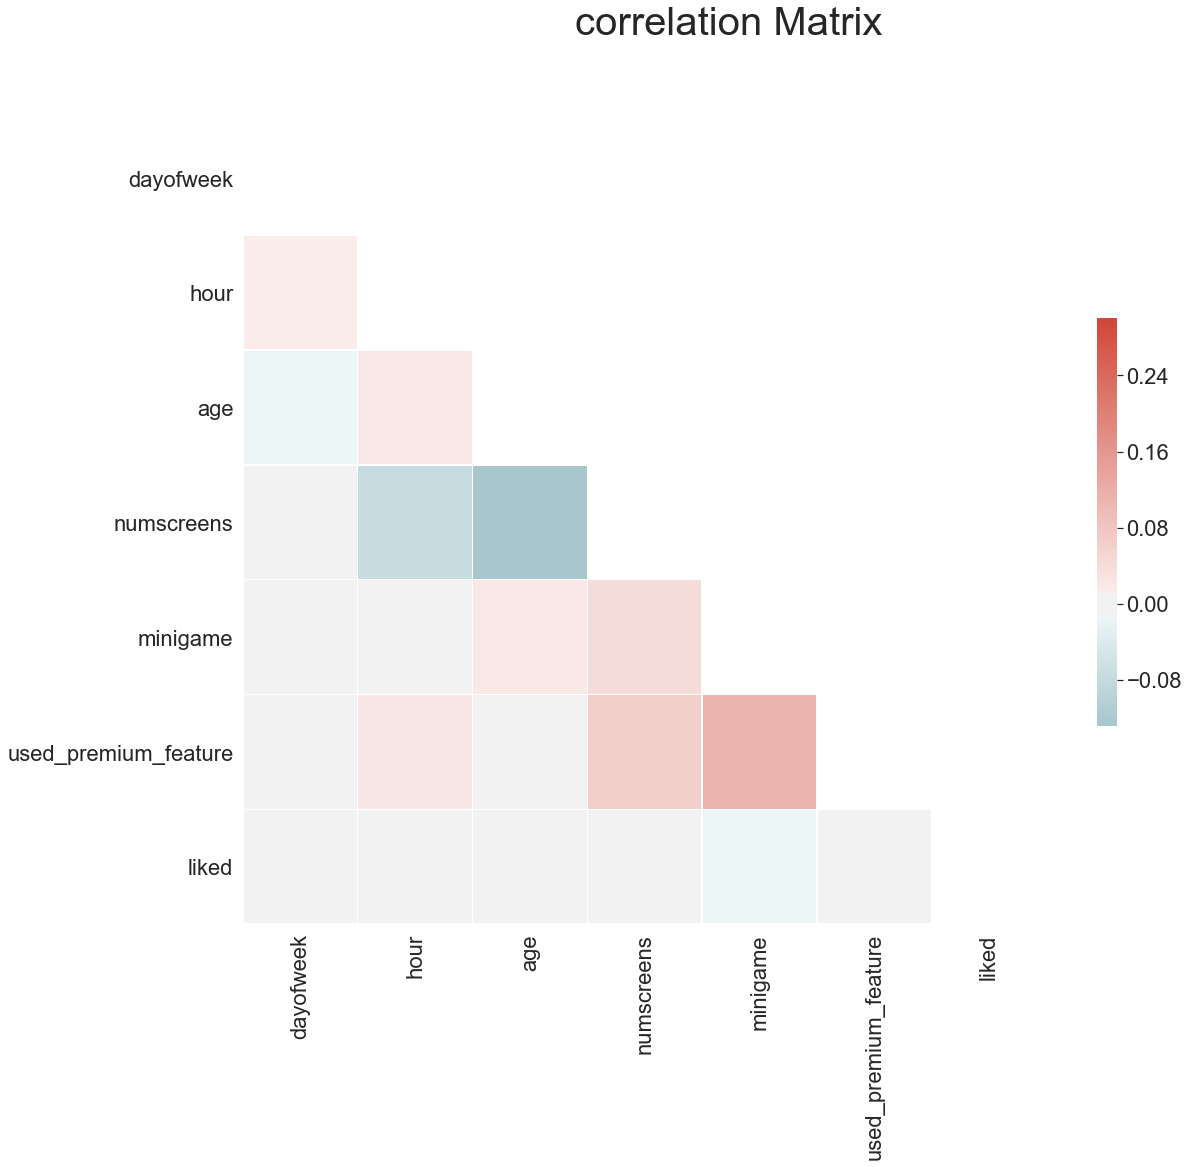

In [54]:
# correlation matrix : this one gives the correlation btwn the variables 
# we want to make sure that no variable is strongly correlated with one another 
# so we go with the assumption that there independent varaibles.

# build the background
sn.set(style="white",font_scale=2)

# compute the correlation matrix 
# we create an array of the correlation of each variable with each other 
corr = dataset2.corr()

# Generate a mask for the upper triangle 
# since the matrix is symetric , we only take the lower end of it 

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure 
f, ax= plt.subplots(figsize=(18,15))
f.suptitle("correlation Matrix",fontsize=40)

# Generate a custom diverging colormap 
# we choose the color 
cmap= sn.diverging_palette(210,15, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio 
sn.heatmap(corr, mask=mask , cmap=cmap , vmax=.3 , center=0,
          square=True, linewidths=.5,cbar_kws={"shrink":.5})


In [19]:
# we can see that the numscreen and age are strong correlated but in a negative way 
# so it means that the more age is high the less numscreens you see 

# we are as minigame and use premium feature is strongly correlated but in a positive way 
# the more mini game you play the more likely to buy 


In [55]:
# building the model 
# first thing we need something to tell us if our model is good or not : validate 
# since we are talking about when a user can buy the premium app after enrollement 
# we need to set a proper date so that we can compare and validate our model 
# to do that we are going to see two features first_open and enrolled_date

# first we are going to see the datatype of the dataframe 
# we need to be able to compare dates , so we need them to be object 
dataset.dtypes

# for loop in python
dataset["first_open"]=[parser.parse(row_data)if isinstance(row_data,str)else row_data for row_data in dataset["first_open"]] 
# this is going to go in loop in first open and convert it into a data object
# this varibale has some empty rows and so we need to add a condition so that we dont get and error 

dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str)else row_data for row_data in dataset["enrolled_date"]] 

# now if we see dtypes , those two are going to be datetimes objects 
dataset.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [56]:
# now we are going to calculate the difference btwn them in hours 
# we create a new column 
# we convert the result to timedelta64 hours 
dataset["difference"]= (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Distribution of time since Enrolled ')

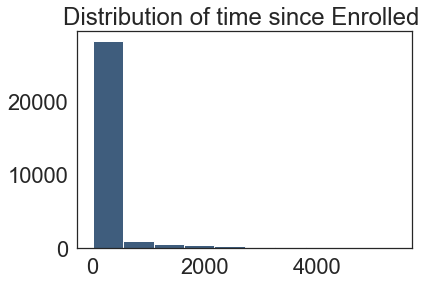

In [57]:
# now we want to see what hours is more appropriate for the validation 
# we use a plot 
plt.hist(dataset["difference"].dropna(),color='#3F5D7D')
plt.title('Distribution of time since Enrolled ')

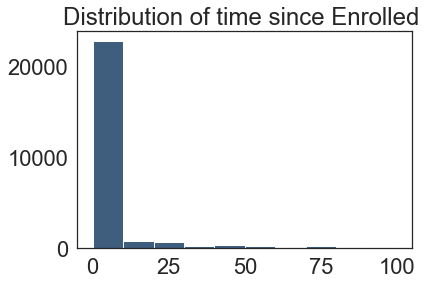

In [58]:
# we can see that the users who enroll the most are the ones that do after the first 500 hours 
# but that is not precise , so now we are going to plot only the first 500 hours to see 

plt.hist(dataset["difference"].dropna(),color='#3F5D7D', range=[0,100])
plt.title('Distribution of time since Enrolled ')
plt.show()

In [59]:
# now we can see that , the majority actually enrolls in the first 10-11 hours

# so now we can make a condition 
# we are going to give them a 48 hour periode if he does not enroll 
# chances are he wont 
# beyond 48 hours , we give it a zero 
# less than that we are gonna leave them as enrolled 

dataset.loc[dataset.difference > 48, 'enrolled']=0

# now that we've seen the data and extract from the variables what we need 
# we can get rid of the ones that we do not need anymore 
dataset = dataset.drop(columns=['difference','enrolled_date','first_open'])

In [60]:
# Formatting the screen_List Field
# applying Feature Engineering to the screen variable 
# for the purpose of this app , we are going to use only the top used screens 
# because there is so much 
# for that we have a new dataset 
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens
 
# now that we've selected the top screens. we want to create for each one a column 
# first we seperate them with a ","
dataset["screen_list"]=dataset.screen_list.astype(str)+','
# now to create a column for each , and the nameof the column is going to be the name of the screen itself 
for sc in top_screens:
    dataset[sc]=dataset.screen_list.str.contains(sc).astype(int) # this return 0 or 1
    dataset["screen_list"]= dataset.screen_list.str.replace(sc+",","") # we replace the screen with and empty string  
    
# now that we removed the top screens from the list 
# now we want to add another column with remaining ones
dataset["Others"]=dataset.screen_list.str.count(",")
# this is the reason why we added the , 

# now that we dont need the screen_list column , might as well drop it
dataset=dataset.drop(columns =["screen_list"])

In [61]:
# Funnels : screens that are related / correlated with each other 
# that causes problems with the model 
# to keep the value of these kind of screens 
# we are going to group them into one funnel 

savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
# it counts all the columns that has the saving count name and sum them.
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
# now that we know how much each one containes of screens we can drop the 
# column
dataset = dataset.drop(columns=savings_screens)

# this one is first funnel / now we are going to do the same for others 



In [62]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [63]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [64]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [65]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('new_appdata100.csv', index = False)